In [1]:
import os
import sys

current_path = os.getcwd()
sys.path.append(current_path + '\..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Import self-made modules
from project2_code.linear_model import LinearModel
from project2_code.make_and_prepare_data import FrankeFunction, create_design_matrix, create_design_matrix_1d
from project2_code.model_selection import R2, MSE

from project2_code.make_and_prepare_data import simple_polynomial
from project2_code.optimization_methods import gradient_descent, stochastic_gradient_descent

In [2]:
n = 1000
x = np.random.rand(n)

# Create polynomial function of x, up to a degree of 5
y = simple_polynomial(x, polynomial_degree = 2)

In [3]:
X = create_design_matrix_1d(x, 2)
X.insert(0, 'bias', 1)

In [4]:
coeff3, cost3 = gradient_descent(X, y, alpha=0.3, max_iterations=2000, return_cost=True)
coeff1, cost1 = gradient_descent(X, y, alpha=0.1, max_iterations=2000, return_cost=True)
coeff5, cost5 = gradient_descent(X, y, alpha=0.5, max_iterations=2000, return_cost=True)
coeff7, cost7 = gradient_descent(X, y, alpha=0.7, max_iterations=2000, return_cost=True)

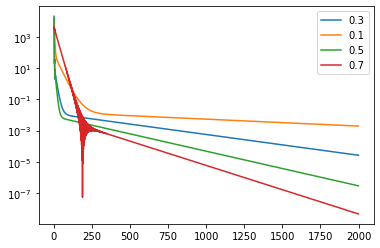

In [5]:
plt.plot(range(2000), cost3, label='0.3');
plt.plot(range(2000), cost1, label='0.1');
plt.plot(range(2000), cost5, label='0.5');
plt.plot(range(2000), cost7, label='0.7');
plt.yscale('log');
plt.legend();

In [6]:
coeff5

bias   -5.553482
x^1     7.378419
x^2    -5.830732
dtype: float64

In [7]:
coeff7

bias   -5.559300
x^1     7.410094
x^2    -5.861233
dtype: float64

In [8]:
np.linalg.inv(X.T @ X) @ X.T @ y

0   -5.560137
1    7.414646
2   -5.865617
dtype: float64

In [9]:
stochastic_gradient_descent(X, y, alpha=0.5, num_batches=1, epochs=1000)

bias   -5.472263
x^1     6.936264
x^2    -5.404949
dtype: float64

In [10]:
gradient_descent(X, y, alpha=0.5, max_iterations=1000)

bias   -5.468619
x^1     6.916426
x^2    -5.385846
dtype: float64